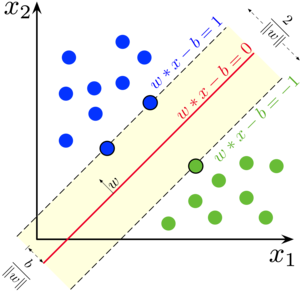

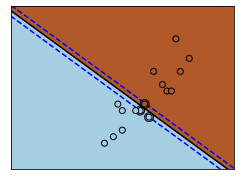

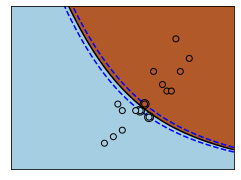

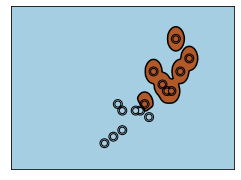

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.c_[
    (38.0, 15.0), #1
    (35.0, 12.0), #1
    (37.0, 20.0), #1
    (29.0, 9.0),  #0
    (30.0, 10.0), #1
    (23.0, 5.0),  #0
    (21.0, 4.0),  #0
    (31.0, 8.0),  #0
    (25.0, 6.0),  #0
    (40.0, 17.0), #1
    (32.0, 15.0), #1
    (36.0, 12.0), #1
    (28.0, 9.0),  #0
    (25.0, 9.0),  #0
    (24.0, 10.0), #0
    (34.0, 13.0), #1
].T
Y = [1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,1]


fignum = 1

for kernel in ("linear", "poly", "rbf"):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)


    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = 0
    x_max = 50
    y_min = 0
    y_max = 25

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["blue", "k", "blue"],
        linestyles=["--", "-", "--"],
        levels=[-1, 0, 1],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()
